<a href="https://colab.research.google.com/github/ashrafya/TWT-ML-applications/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('ggplot')
global days
days = 40

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
#get the stock quote for teh company

quotes = web.DataReader('AAPL', data_source = 'yahoo', start = '2005-01-01', end = '2020-05-01')

#show data
quotes


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,4.650714,4.471428,4.627143,4.520714,172998000.0,3.913571
2005-01-04,4.676429,4.497857,4.556428,4.567143,274202600.0,3.953765
2005-01-05,4.660714,4.575000,4.604286,4.607143,170108400.0,3.988392
2005-01-06,4.636428,4.523571,4.619286,4.610714,176388800.0,3.991483
2005-01-07,4.973571,4.625000,4.642857,4.946429,556862600.0,4.282110
...,...,...,...,...,...,...
2020-04-27,284.540009,279.950012,281.799988,283.170013,29271900.0,282.405548
2020-04-28,285.829987,278.200012,285.079987,278.579987,28001200.0,277.827911
2020-04-29,289.670013,283.890015,284.730011,287.730011,34320200.0,286.953247


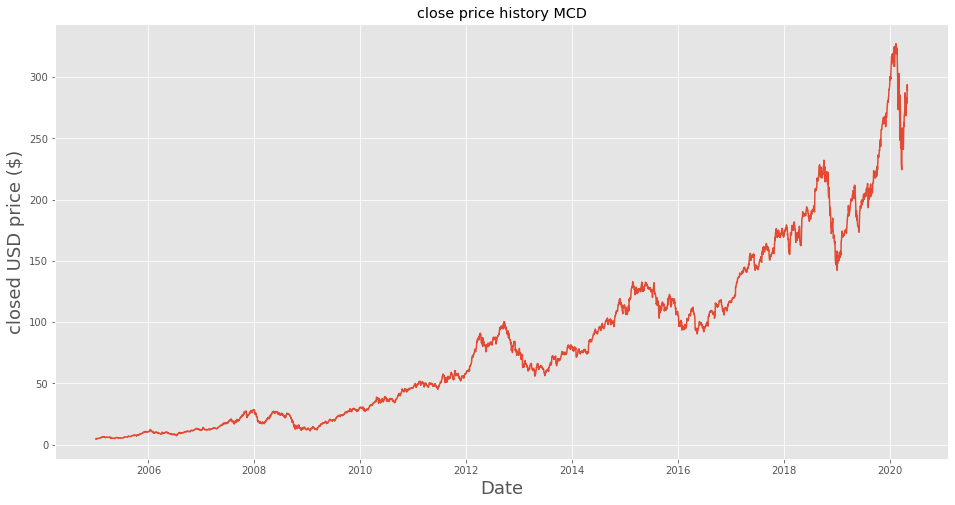

In [3]:
#visualize the closing proce of the stock history
plt.figure(figsize = (16,8))
plt.title('close price history MCD')
plt.plot(quotes['Close'])
plt.xlabel('Date', fontsize =18)
plt.ylabel('closed USD price ($)', fontsize =18)
plt.show()


In [4]:
#create a new dataframe with only the close column
data =  quotes.filter(['Close'])
                      
#covert data to numpy array
dataset = data.values


#get number of rows to train the data on
train_data_len = math.ceil(len(dataset)*0.9)

print(train_data_len)

3474


In [0]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [6]:
#create the training dataset
#also create the scaled training data set subsequently

train_data = scaled_data[0:train_data_len,:]
print(train_data)
print(train_data.shape)

#split into x and y training data sets

x_train=[]
y_train=[]

for i in range(days, len(train_data)):
  x_train.append(train_data[i-days:i,0])
  y_train.append(train_data[i,0])
  




[[0.00000000e+00]
 [1.43884906e-04]
 [2.67846877e-04]
 ...
 [6.74444506e-01]
 [6.71469442e-01]
 [6.55447348e-01]]
(3474, 1)


In [7]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1 ))
x_train.shape

(3434, 40, 1)

In [0]:
#Build teh LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
3434/3434 [==============================] - 76s 22ms/step - loss: 3.9345e-04


In [0]:
#create testing data set
test_data = scaled_data[train_data_len-days:,:]
#create the data sets x_test and y_test
x_test=[]
y_test = dataset[train_data_len,:]
for i in range(days, len(test_data)):
  x_test.append(test_data[i-days:i,0])


In [12]:
#convert data to  a numpy array
x_test = np.array(x_test)
x_test.shape

(385, 40)

In [0]:
#reshape the data to 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



In [15]:
#get the root mean squared error (RMSE)
rmse = (np.sqrt(np.mean(((predictions- y_test)**2))))
rmse

44.80023907290905

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


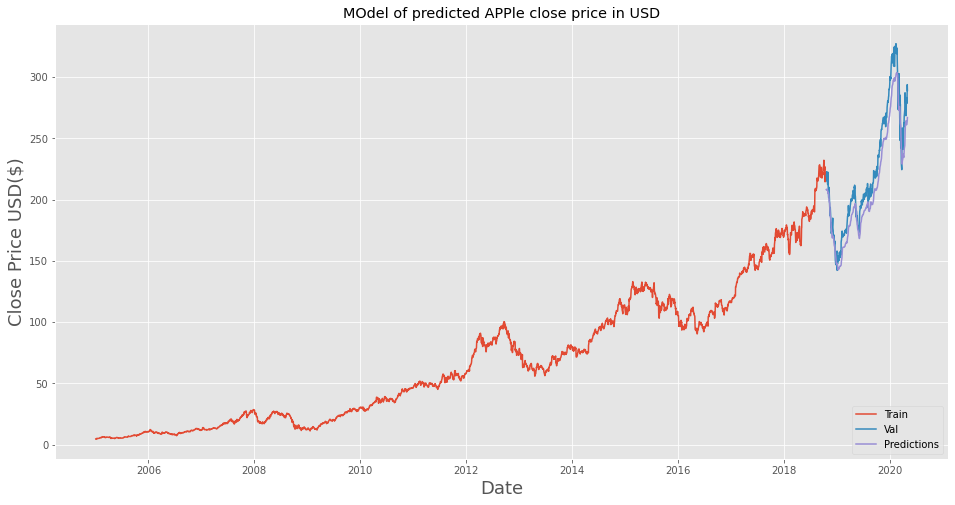

In [16]:
#plot the data
train = data [:train_data_len]
valid = data[train_data_len:]
valid['Predictions']=predictions

#visualize model/data
plt.figure(figsize=(16,8))
plt.title('MOdel of predicted APPle close price in USD')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [17]:
print(valid['Close'][30] )
print(valid['Predictions'][30])
32.299056502120834-28.43409409504

184.82000732421875
169.01695


3.864962407080835